# **Project Name : Stock Market Prediction And Forecasting Using Bidirectional LSTM**

# **Objective**

 To develop an innovative Stock Market Prediction and Forecasting system utilizing Bidirectional Long Short-Term Memory Recurrent Neural Networks (Bi-LSTM RNN), aimed at leveraging historical data to enhance predictive accuracy, enabling investors to make informed decisions in dynamic market conditions.











# **Data Collection**

In [1]:
# import libraries
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# library for pre-processing
from sklearn.preprocessing import MinMaxScaler

**pandas_datareader  library, which is a Python module that provides an interface to various financial and economic data sources, allowing you to easily retrieve and work with data in a Pandas DataFrame.**

In [ ]:
#get data from tiingo api
stock_df  = pdr.get_data_tiingo('ACLS',api_key='6904cbc05688deea526ce8bdee518a2767967009')

<ipython-input-3-6e2710baeed9>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  stock_df  = pdr.get_data_tiingo('ACLS',api_key='6904cbc05688deea526ce8bdee518a2767967009')


ACLS : Axcelis Technologies

Nasdaq : National Association of Securities Dealers Automated Quotations

The NASDAQ is a U.S.-based stock market exchange and the second-largest stock exchange by market cap globally.

In [ ]:
# convert data into csv fromat
stock_df.to_csv('stock_data_aacl.csv')

In [ ]:
#get data from stock_data_aacl.csv
aacl_stock_df =  pd.read_csv('stock_data_aacl.csv')
aacl = pd.read_csv('stock_data_aacl.csv')

In [ ]:
#get top records
aacl_stock_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ACLS,2019-02-21 00:00:00+00:00,22.13,22.6427,22.090,22.53,227940,22.13,22.6427,22.090,22.53,227940,0.0,1.0
1,ACLS,2019-02-22 00:00:00+00:00,22.02,22.2800,21.850,22.28,221995,22.02,22.2800,21.850,22.28,221995,0.0,1.0
2,ACLS,2019-02-25 00:00:00+00:00,21.82,22.3500,21.795,22.26,234453,21.82,22.3500,21.795,22.26,234453,0.0,1.0
3,ACLS,2019-02-26 00:00:00+00:00,21.46,21.9200,21.440,21.79,150742,21.46,21.9200,21.440,21.79,150742,0.0,1.0
4,ACLS,2019-02-27 00:00:00+00:00,21.25,21.4100,20.830,21.41,171009,21.25,21.4100,20.830,21.41,171009,0.0,1.0


In [ ]:
#get last records
aacl_stock_df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,ACLS,2024-02-12 00:00:00+00:00,122.32,126.64,121.2401,125.06,870368,122.32,126.64,121.2401,125.06,870368,0.0,1.0
1253,ACLS,2024-02-13 00:00:00+00:00,118.35,122.64,116.0500,116.92,913497,118.35,122.64,116.0500,116.92,913497,0.0,1.0
1254,ACLS,2024-02-14 00:00:00+00:00,120.60,122.69,119.0000,120.20,619027,120.60,122.69,119.0000,120.20,619027,0.0,1.0
1255,ACLS,2024-02-15 00:00:00+00:00,119.26,123.00,117.7900,121.86,635150,119.26,123.00,117.7900,121.86,635150,0.0,1.0
1256,ACLS,2024-02-16 00:00:00+00:00,116.78,122.40,116.6900,120.45,613446,116.78,122.40,116.6900,120.45,613446,0.0,1.0


ACLS Stock data avilable from 2019-02-04 to 2024-02-02.

In [ ]:
aacl_stock_df_close  = aacl_stock_df.reset_index()['close']
aacl_stock_df_close

0        22.13
1        22.02
2        21.82
3        21.46
4        21.25
         ...  
1252    122.32
1253    118.35
1254    120.60
1255    119.26
1256    116.78
Name: close, Length: 1257, dtype: float64

In [ ]:
aacl.reset_index(inplace=True)
aacl.head()

,index,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,ACLS,2019-02-21 00:00:00+00:00,22.13,22.6427,22.090,22.53,227940,22.13,22.6427,22.090,22.53,227940,0.0,1.0
1,1,ACLS,2019-02-22 00:00:00+00:00,22.02,22.2800,21.850,22.28,221995,22.02,22.2800,21.850,22.28,221995,0.0,1.0
2,2,ACLS,2019-02-25 00:00:00+00:00,21.82,22.3500,21.795,22.26,234453,21.82,22.3500,21.795,22.26,234453,0.0,1.0
3,3,ACLS,2019-02-26 00:00:00+00:00,21.46,21.9200,21.440,21.79,150742,21.46,21.9200,21.440,21.79,150742,0.0,1.0
4,4,ACLS,2019-02-27 00:00:00+00:00,21.25,21.4100,20.830,21.41,171009,21.25,21.4100,20.830,21.41,171009,0.0,1.0


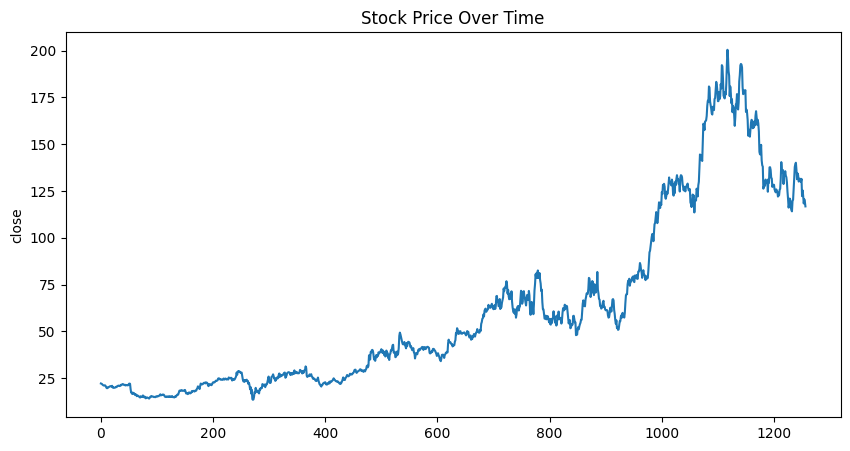

In [ ]:
# visualization trend of closing price

plt.figure(figsize=(10, 5))
sns.lineplot(aacl_stock_df_close)
plt.title('Stock Price Over Time')
plt.show()

In [ ]:
# visualization of closing price over the year

import pandas_datareader
import datetime
import pandas_datareader.data as web
import plotly.express as px


aacl['date'] = pd.to_datetime(aacl['date'])
aacl['year'] = aacl['date'].dt.year

fig = px.line(aacl, x="date", y="close", color="year", hover_name="close", line_group="year",
              labels={"close": "Close Price", "date": "Date", "year": "Year"},
              title="Close Price Over Time by Year")

fig.show()


In [ ]:
# apply scaling

scaler_data = MinMaxScaler(feature_range=(0,1))
aacl_stock_df_close = scaler_data.fit_transform(np.array(aacl_stock_df_close).reshape(-1,1))


LSTM are sensitive to the scale of the data , so we apply MinMax Scaler
convert this scled data into numpy array

In [ ]:
#get a size of an dataframe
aacl_stock_df_close.shape

(1257, 1)

In [ ]:
# numpy array of scled data
aacl_stock_df_close

array([[0.0465626 ],
       [0.04597455],
       [0.04490538],
       ...,
       [0.57297124],
       [0.56580776],
       [0.55254998]])

# **Divide The Data Into Train And Test**

In [ ]:
## train test split

train_size = int(len(aacl_stock_df_close)*0.65)
test_size = len(aacl_stock_df_close) - train_size
train_data , test_data = aacl_stock_df_close[0:train_size,:],aacl_stock_df_close[train_size:len(aacl_stock_df_close),:1]

In [ ]:
# get a train and test size
train_size,test_size

(817, 440)

In [ ]:
# conevert an array of values into a dataset matrix

def create_dataset_matrix(dataset,time_stamp=1):
  dataX, dataY = [],[]
  for i in range (len(dataset)-time_stamp-1):
    a = dataset[i:(i+time_stamp),0]
    dataX.append(a)
    dataY.append(dataset[i+time_stamp,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
#get train and test data
time_stamp = 100
x_train ,y_train  = create_dataset_matrix(train_data,time_stamp)
x_test , y_test = create_dataset_matrix(test_data,time_stamp)

In [ ]:
print(x_train.shape),print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(x_test.shape) , print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
#reshape input to be [sample,time steps ,features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_test[0].shape

(100, 1)

## **Create a Bidirectional LSTM Model**

In [ ]:
#import libraries for build model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional,LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
#implemnataion of bidirectional lstm model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Dropout, BatchNormalization
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True, input_shape=(100, 1))))

model.add(Bidirectional(LSTM(50, dropout=0.5, return_sequences=True)))  # Corrected input shape
model.add(Bidirectional(LSTM(50, dropout=0.5)))
model.add(BatchNormalization(momentum=0.6))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=30, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor], verbose=1, batch_size=64, epochs=500)


Epoch 1/500
12/12 [==============================] - 36s 693ms/step - loss: 0.0377 - val_loss: 0.0107
Epoch 2/500
12/12 [==============================] - 5s 384ms/step - loss: 0.0085 - val_loss: 0.0069
Epoch 3/500
12/12 [==============================] - 4s 377ms/step - loss: 0.0034 - val_loss: 0.0105
Epoch 4/500
12/12 [==============================] - 6s 489ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 5/500
12/12 [==============================] - 5s 379ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 6/500
12/12 [==============================] - 6s 496ms/step - loss: 0.0016 - val_loss: 0.0043
Epoch 7/500
12/12 [==============================] - 5s 377ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 8/500
12/12 [==============================] - 5s 431ms/step - loss: 0.0011 - val_loss: 0.0068
Epoch 9/500
12/12 [==============================] - 6s 488ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 10/500
12/12 [==============================] - 4s 376ms/step - loss: 8.9110e-04 - v

In [ ]:
# let's do prediction on tarining and testing data
train_predict = model.predict(x_train)
test_predict= model.predict(x_test)

11/11 [==============================] - 1s 64ms/step


In [ ]:
#Transform data to original form
train_predict = scaler_data.inverse_transform(train_predict)
test_predict = scaler_data.inverse_transform(test_predict)

In [ ]:
# transform data into original form
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)
in_y_train = scaler_data.inverse_transform(y_train_reshaped)
in_y_test = scaler_data.inverse_transform(y_test_reshaped)

# **Model Evalution**

In [ ]:
# import libraries for performance metrics
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# calculate performance metrics RMSE for tarining and testing data
train_rmse = math.sqrt(mean_squared_error(y_train,train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
print(train_rmse)
print(test_rmse)

38.51138529309228
134.11118994258334


In [ ]:
# calculate performance metrics r2_score for tarining and testing data
train_r2 = r2_score(in_y_train,train_predict)
test_r2 = r2_score(in_y_test,test_predict)
print(train_r2)
print(test_r2)

0.9480356129962559
0.9660263675256149


In [ ]:
test_predict

array([[ 63.377445],
       [ 62.018757],
       [ 60.441322],
       [ 59.365658],
       [ 57.871525],
       [ 56.571396],
       [ 55.239685],
       [ 54.190445],
       [ 53.776737],
       [ 53.92709 ],
       [ 54.139107],
       [ 54.85385 ],
       [ 55.60798 ],
       [ 56.01957 ],
       [ 56.768578],
       [ 57.154507],
       [ 57.589554],
       [ 57.72818 ],
       [ 58.173954],
       [ 59.54335 ],
       [ 61.679073],
       [ 63.74419 ],
       [ 65.51454 ],
       [ 67.90568 ],
       [ 70.278366],
       [ 72.06034 ],
       [ 73.77624 ],
       [ 74.52025 ],
       [ 75.324844],
       [ 75.94981 ],
       [ 76.63648 ],
       [ 77.3655  ],
       [ 78.05402 ],
       [ 78.61209 ],
       [ 78.62129 ],
       [ 78.50723 ],
       [ 78.93796 ],
       [ 79.267235],
       [ 79.49421 ],
       [ 79.90296 ],
       [ 79.908745],
       [ 79.76169 ],
       [ 80.230576],
       [ 80.74281 ],
       [ 81.547295],
       [ 82.82004 ],
       [ 83.818184],
       [ 84.1

# **Visualization Of Model Prediction On Train and Test Data**

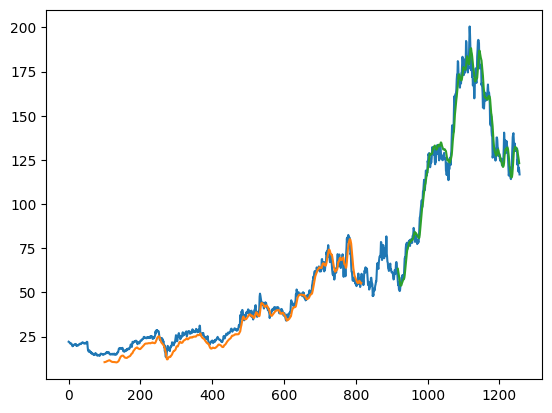

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(aacl_stock_df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(aacl_stock_df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(aacl_stock_df_close)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler_data.inverse_transform(aacl_stock_df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Green Line : Test Data Prediction

Orange Line : Train Data Prediction

In [ ]:
len(test_data)

440

In [ ]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)


In [ ]:
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

[0.751737410456538,
 0.771944830535657,
 0.7925264620977226,
 0.7999037741900995,
 0.7976585052924196,
 0.7759007804982359,
 0.7855233614882926,
 0.7779322142628033,
 0.7950924836950711,
 0.7836523040735592,
 0.8113439538116112,
 0.8244948144980221,
 0.8074414626323105,
 0.7855768202715706,
 0.7999037741900995,
 0.7898000641505399,
 0.7663316582914573,
 0.7083288784347267,
 0.7012188602587405,
 0.7015128835667701,
 0.7283224633807334,
 0.6840051320431947,
 0.6699454720410564,
 0.6662033572115899,
 0.6032556399016358,
 0.6098577996364802,
 0.6098577996364802,
 0.6126911151502191,
 0.6291564203998717,
 0.6193200042767028,
 0.6201753448091522,
 0.6249331765209023,
 0.5944082112691115,
 0.6302255960654336,
 0.6199615096760397,
 0.664065005880466,
 0.6644926761466908,
 0.656527317438255,
 0.6340211696781781,
 0.6321501122634448,
 0.6082005773548593,
 0.613225702983,
 0.6144552549983963,
 0.6140810435154496,
 0.6005559713460922,
 0.5972949855661285,
 0.5926440714209344,
 0.6010905591788731,


In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



[0.57315487]
101
1 day input [0.77194483 0.79252646 0.79990377 0.79765851 0.77590078 0.78552336
 0.77793221 0.79509248 0.7836523  0.81134395 0.82449481 0.80744146
 0.78557682 0.79990377 0.78980006 0.76633166 0.70832888 0.70121886
 0.70151288 0.72832246 0.68400513 0.66994547 0.66620336 0.60325564
 0.6098578  0.6098578  0.61269112 0.62915642 0.61932    0.62017534
 0.62493318 0.59440821 0.6302256  0.61996151 0.66406501 0.66449268
 0.65652732 0.63402117 0.63215011 0.60820058 0.6132257  0.61445525
 0.61408104 0.60055597 0.59729499 0.59264407 0.60109056 0.59708115
 0.59419438 0.58056239 0.58393029 0.58414412 0.59959371 0.6028547
 0.63124131 0.67898001 0.65577889 0.64920346 0.65626002 0.61648669
 0.64893617 0.64155886 0.65310596 0.64032931 0.63583877 0.62156527
 0.59499626 0.57468192 0.54907516 0.55816316 0.57494921 0.57056559
 0.54880787 0.54207206 0.53832995 0.56778574 0.57158131 0.60007484
 0.63198974 0.66534802 0.67309954 0.67726933 0.65695499 0.63011868
 0.64685128 0.64145194 0.62348979 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(aacl_stock_df_close)

1257

# **Forecasting Stock Closing Price**

In [ ]:
# plt.plot(day_new,scaler_data.inverse_transform(aacl_stock_df_close[1157:]))
# plt.plot(day_pred,scaler_data.inverse_transform(lst_output))
import plotly.graph_objects as go

# Assuming 'day_new', 'scaler_data', 'aacl_stock_df_close', 'day_pred', and 'lst_output' are defined

# Create a figure
fig = go.Figure()

# Add actual data trace with hover
fig.add_trace(go.Scatter(x=day_new, y=scaler_data.inverse_transform(aacl_stock_df_close[1157:]).flatten(), mode='lines', name='Actual',
                         hovertemplate='Day: %{x}<br>Actual Price: %{y}'))

# Add predicted data trace with hover
fig.add_trace(go.Scatter(x=day_pred, y=scaler_data.inverse_transform(lst_output).flatten(), mode='lines', name='Predicted',
                         hovertemplate='Day: %{x}<br>Predicted Price: %{y}'))

# Update layout
fig.update_layout(title='Actual vs Predicted Stock Prices',
                  xaxis_title='Day',
                  yaxis_title='Stock Price')

# Show the figure
fig.show()



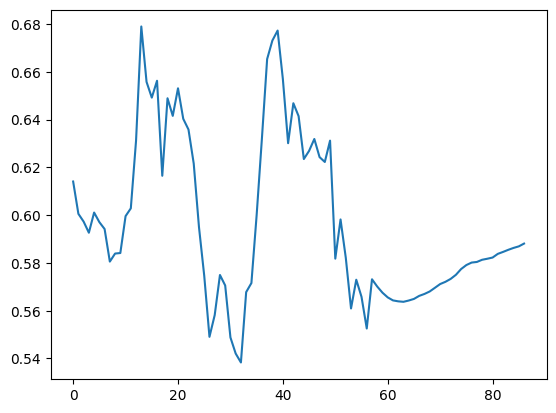

In [ ]:
df3=aacl_stock_df_close.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


